In [3]:
import cdms2 as cdms
import MV2 as MV
import cdtime,cdutil,genutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import string
import glob
import scipy.stats as stats
# Local solution
# If running remotely, uncomment the following code:
# %%bash
# git clone https://github.com/katemarvel/CMIP5_tools
# import CMIP5_tools as cmip5
import sys,os
sys.path.append("/Users/kmarvel/Google Drive/python-utils")

import CMIP5_tools as cmip5
import DA_tools
import Plotting

from eofs.cdms import Eof
from eofs.multivariate.cdms import MultivariateEof
%matplotlib inline


In [4]:
central_plains=cdutil.region.domain(longitude=(-105,-92),latitude=(32,46))
southwest=cdutil.region.domain(longitude=(-125,-105),latitude=(32,41))


In [5]:
#sshfs mout to kdm2144@dester.ldeo.columbia.edu:/home/kdm2144/ 
#datadirec="/Users/kmarvel/Documents/DATA/dester/"
datadirec="/Volumes/RAVEN/CMIP6/cmip6interp/"
writedirec="/Users/kmarvel/Documents/DATA/dester/regional_averages/"
fixedvardirec="/Users/kmarvel/Documents/DATA/dester/fixedvar/"

In [15]:
allfiles=glob.glob(datadirec+"*")
for file in allfiles:
    variable,regrid,model,hist,ssp,starttime,stoptime,nc=file.split(".")
    

hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist-ssp245
hist-ssp370
hist-ssp585
hist

In [18]:
f=cdms.open(datadirec+"pr.regrid.CESM2.hist.ssp370.1850.2100.nc")
f["pr"].getAxisIds()

['ens', 'yr', 'mon', 'lat', 'lon']

In [163]:
variables=[x.split("/")[-1] for x in glob.glob(datadirec+"*")]

variable=variables[0]

cmd = "mkdir "+writedirec+"/central_plains/"+variable
os.system(cmd)

cmd = "mkdir "+writedirec+"/southwest/"+variable
os.system(cmd)
#modeldirs=glob.glob(datadirec+experiment+"/"+variable+"/*")
modeldirs=glob.glob(datadirec+variable+"/*")

In [164]:
direc=modeldirs[0]
model=direc.split("/")[-1]
allfiles=glob.glob(direc+"/*")
experiments=np.unique([x.split(".")[1] for x in allfiles])
experiment="historical"
rips=np.unique([x.split(".")[-3] for x in allfiles])
rip=rips[0]
landthresh=1
#Get the land fraction
landfiles=glob.glob(fixedvardirec+"sftlf*"+model+"*")
landfiles

if len(landfiles)==1:
    fland=cdms.open(landfiles[0])
    landfrac=fland("sftlf")
    fland.close()
else:
    print("can't find land fraction file")
#print(direc)
ripfiles=np.sort(glob.glob(direc+"/"+variable+"."+experiment+"."+model+"."+rip+"*"))


In [148]:
# direc=modeldirs[0]
# model=direc.split("/")[-1]
# landthresh=1
# #Get the land fraction
# landfiles=glob.glob(fixedvardirec+"sftlf*"+model+"*")
# landfiles

# if len(landfiles)==1:
#     fland=cdms.open(landfiles[0])
#     landfrac=fland("sftlf")
#     fland.close()
# else:
#     print("can't find land fraction file")
# allfiles=glob.glob(direc+"/*")
# rips=np.unique([x.split(".")[-3] for x in allfiles])

for rip in rips:
    yearcheck=[]
    #ripfiles=sorted(glob.glob(direc+"/*"+rip+"*"))
    ripfiles=np.sort(glob.glob(direc+"/"+variable+"."+experiment+"."+model+"."+rip+"*"))
    L=len(ripfiles)
    i=0
    ripfile=ripfiles[i]
    f=cdms.open(ripfile)
    data=f(variable)
    latax=data.getLatitude()
    lonax=data.getLongitude()
    tax=np.arange(12)
    fpath,fexpt,fmodel,frip,fyear,fnc=ripfile.split(".")
    CP=MV.zeros(L*12)
    SW=MV.zeros(L*12)
    full[12*i:12*(i+1)]=data
   
    f.close()
    yearcheck+=[float(fyear)]
    for i in range(L)[1:]:
      
        ripfile=ripfiles[i]

        f=cdms.open(ripfile)
        data=f(variable)
        landdata=MV.masked_where(np.repeat(landfrac.asma()[np.newaxis],12,axis=0)<landthresh,data)
        f.close()
        fpath,fexpt,fmodel,frip,fyear,fnc=ripfile.split(".")
        CP[12*i:12*(i+1)]=cdutil.averager(landdata(central_plains),axis='xy')
        SW[12*i:12*(i+1)]=cdutil.averager(landdata(southwest),axis='xy')
        yearcheck+=[float(fyear)]
    tax=cdms.createAxis(np.arange(L*12))
    tax.designateTime()
    tax.units='months since 1850-1-1'
    CP.setAxis(0,tax)
    SW.setAxis(0,tax)
    CP.id=variable
    SW.id=variable
        
       

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


In [149]:
tax=cdms.createAxis(np.arange(L*12))
tax.designateTime()
tax.units='months since 1850-1-1'
CP.setAxis(0,tax)
SW.setAxis(0,tax)
CP.id=variable
SW.id=variable


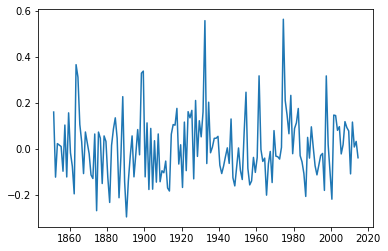

In [157]:
cdutil.setTimeBoundsMonthly(SW)
Plotting.time_plot(cdutil.JJA.departures(SW,criteriaarg=(1,None))[1:])

In [165]:
variable+"."+experiment+"."+model+"."+rip+".nc"

'evspsbl.historical.BCC-CSM2-MR.r1i1p1f1.nc'

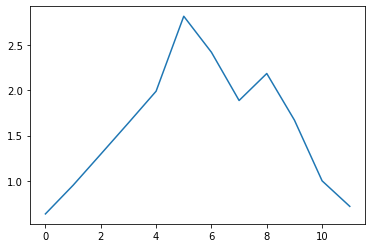

In [65]:
plt.plot(cdutil.averager(data(central_plains),axis='xy',weights='generate').asma())

AveragerError: ('E', 'r', 'r', 'o', 'r', ':', ' ', 'M', 'u', 'l', 't', 'i', 'p', 'l', 'e', ' ', 'a', 'x', 'e', 's', ' ', 'p', 'a', 's', 's', 'e', 'd', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'w', 'e', 'i', 'g', 'h', 't', 's', ' ', 't', 'o', ' ', 'm', 'a', 't', 'c', 'h')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


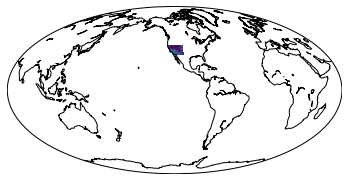

In [83]:
test=data[0]
testland=MV.masked_where(landfrac==0,test)
m=Plotting.bmap(testland(southwest))
m.drawcoastlines()

sftlf
masked_array(
  data=[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)